In [1]:
%matplotlib inline

import time, datetime

#Data Manipulation
import pandas as pd
import numpy as np
import plotly.express as px
from pandas.plotting import scatter_matrix

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

#Machine Learning 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 
from IPython.display import Image  
#import graphviz
from sklearn import metrics
from sklearn import model_selection
#from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from catboost import Pool, CatBoostClassifier, cv
from sklearn.metrics import precision_score, recall_score

#ignore warning 
import  warnings
warnings.filterwarnings('ignore')

## LOAD DATA

In [2]:
wine_data = pd.read_csv('winequality-red.csv', sep=';')

In [3]:
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## DATA VISULIZATION



In [7]:
fig = px.histogram(wine_data, x='fixed acidity', template="presentation", title="Fixed Acidity in Wine", width=700, height=450)
fig.show()

Unsupported

In [8]:
fig = px.histogram(wine_data, x='volatile acidity', template="presentation", title="volatile acidity in Wine", width=700, height=450)
fig.show()

Unsupported

In [9]:
fig = px.histogram(wine_data, x='citric acid', template="presentation", title="citric acid in Wine", width=700, height=450)
fig.show()

Unsupported

In [10]:
fig = px.histogram(wine_data, x='residual sugar', template="presentation", title="residual sugar in Wine", width=700, height=450)
fig.show()

Unsupported

In [11]:
fig = px.histogram(wine_data, x='chlorides', template="presentation", title="chlorides in Wine", width=700, height=450)
fig.show()

Unsupported

In [12]:
fig = px.histogram(wine_data, x='free sulfur dioxide', template="presentation", title="free sulfur dioxide in Wine", width=700, height=450)
fig.show()

Unsupported

In [13]:
fig = px.histogram(wine_data, x='total sulfur dioxide', template="presentation", title="total sulfur dioxide in Wine", width=700, height=450)
fig.show()

Unsupported

In [14]:
fig = px.histogram(wine_data, x='density', template="presentation", title="density in Wine", width=700, height=450)
fig.show()

Unsupported

In [15]:
fig = px.histogram(wine_data, x='pH', template="presentation", title="pH in Wine", width=700, height=450)
fig.show()

Unsupported

In [16]:
fig = px.histogram(wine_data, x='sulphates', template="presentation", title="sulphates in Wine", width=700, height=450)
fig.show()

Unsupported

In [17]:
fig = px.histogram(wine_data, x='alcohol', template="presentation", title="alcohol in Wine", width=700, height=450)
fig.show()

Unsupported

In [18]:
fig = px.histogram(wine_data, x='quality', template="presentation", title="quality of the Wine", width=700, height=450)
fig.show()

Unsupported

In [19]:
corr = wine_data.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


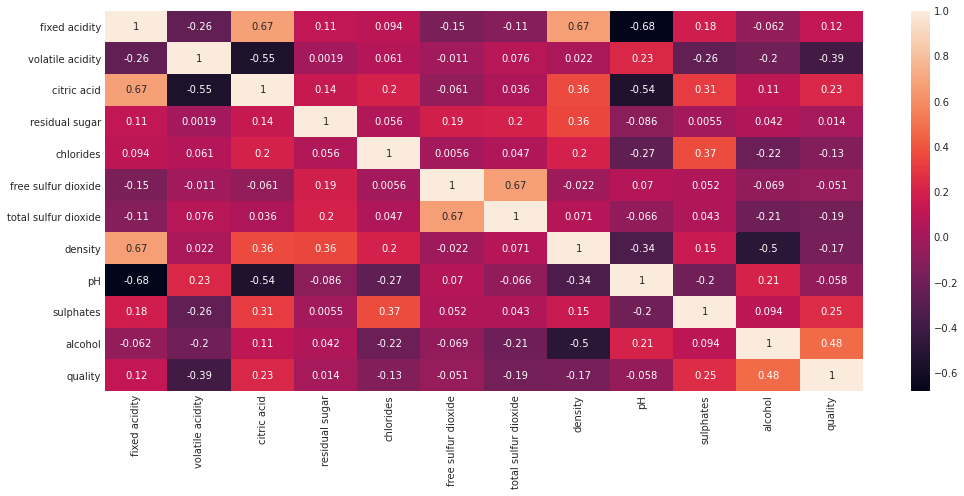

In [20]:
plt.figure(figsize=(17,7))
sns.heatmap(corr, annot=True);

## START BUILDING THE MACHINE LAERNING MODEL

In [21]:
bins = (2,5.6,8)
labels = ['Good', 'Bad']

wine_data["quality"] = pd.cut(x = wine_data["quality"], bins= bins, labels=labels)

Bad     855
Good    744
Name: quality, dtype: int64


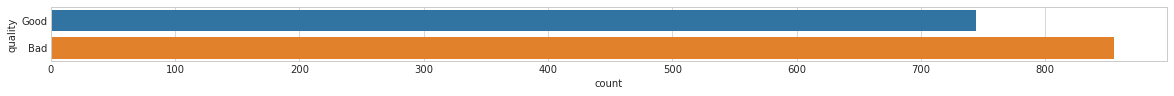

In [22]:
plt.figure(figsize=(20,1))
sns.countplot(y="quality", data=wine_data)
print(wine_data["quality"].value_counts())

In [23]:
#change good = 1.0 and bad = 0.0 with label encoder
labelencoder_y = LabelEncoder()
wine_data["quality"] = labelencoder_y.fit_transform(wine_data["quality"])

In [24]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [25]:
x = wine_data.drop('quality', axis =1)
y = wine_data['quality']

In [26]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [27]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: quality, dtype: int64

## Split Data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [29]:
print(' X_train  = ', X_train.shape,'\n',
      'X_test   = ', X_test.shape,'\n',
      'y_train  = ', y_train.shape,'\n',
      'y_test   = ', y_test.shape)

 X_train  =  (1119, 11) 
 X_test   =  (480, 11) 
 y_train  =  (1119,) 
 y_test   =  (480,)


# Define a function to fit machine learning algorithms

In [30]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)

    #Confusion matrix 

    
    return train_pred, acc, acc_cv, model

## Define a function to measure the accuracy of the model

In [31]:
def model_score(model, X_train, y_train,cv):
    #cross validation
    y_train_pred =  model_selection.cross_val_predict(model, X_train, y_train, cv=cv, n_jobs=-1)

    #precision 
    pre_scr = precision_score(y_train, y_train_pred)

    #re-call
    re_scr = recall_score(y_train, y_train_pred)

    #F1- Score 
    f_score = f1_score(y_train, y_train_pred)



    #Auc Score
    y_score_r =  model_selection.cross_val_predict(model, X_train, y_train)


    a_score = roc_auc_score(y_train, y_score_r)

    return pre_scr, re_scr, f_score, a_score

## Graph

In [32]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
def roc_plot(y_score,y_test):
  fpr, tpr, thresholds = roc_curve(y_test, y_score)

  fig = px.area(
      x=fpr, y=tpr,
      title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
      labels=dict(x='False Positive Rate', y='True Positive Rate'),
      width=700, height=500
  )
  fig.add_shape(
      type='line', line=dict(dash='dash'),
      x0=0, x1=1, y0=0, y1=1
  )

  fig.update_yaxes(scaleanchor="x", scaleratio=1)
  fig.update_xaxes(constrain='domain')
  fig.show()

  precision, recall, thresholds = precision_recall_curve(y_test, y_score)

  fig = px.area(
      x=recall, y=precision,
      title=f'Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})',
      labels=dict(x='Recall', y='Precision'),
      width=700, height=500
  )
  fig.add_shape(
      type='line', line=dict(dash='dash'),
      x0=0, x1=1, y0=1, y1=0
  )
  fig.update_yaxes(scaleanchor="x", scaleratio=1)
  fig.update_xaxes(constrain='domain')
  fig.show()
  return

# Logistic Regression

In [33]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log,model_log= fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 75.25
Accuracy CV 10-Fold: 74.89
Running Time: 0:00:02.031333


In [34]:
y_score = model_log.predict_proba(X_test)
y_score = y_score[:,1]
roc_plot(y_score, y_test)

Unsupported

## KNN Classifier

In [35]:
# Logistic Regression
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn, model_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors=5, weights='distance'), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 69.88
Running Time: 0:00:00.123012


In [36]:
y_score = model_knn.predict_proba(X_test)
y_score = y_score[:,1]
roc_plot(y_score, y_test)

Unsupported

## Gaussian Naive Bayes

In [37]:
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian, model_gb = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 73.37
Accuracy CV 10-Fold: 73.73
Running Time: 0:00:00.086626


In [38]:
y_score = model_gb.predict_proba(X_test)
y_score = y_score[:,1]
roc_plot(y_score, y_test)

Unsupported

## Linear Support Vector Machines (SVC)

In [39]:
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc, model_svc = fit_ml_algo(SVC(probability=True),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 63.36
Accuracy CV 10-Fold: 62.38
Running Time: 0:00:03.200447


In [40]:
y_score = model_svc.predict_proba(X_test)
y_score = y_score[:,1]
roc_plot(y_score, y_test)

Unsupported

## Gradient Boost Trees

In [41]:
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt,model_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 87.85
Accuracy CV 10-Fold: 77.12
Running Time: 0:00:02.157245


In [42]:
y_score = model_gbt.predict_proba(X_test)
y_score = y_score[:,1]
roc_plot(y_score, y_test)

Unsupported

## Model Results

In [43]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Linear SVC', 
              'Gradient Boosting Trees',
              ],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian,  
        acc_linear_svc, 
        acc_gbt,
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
0,KNN,100.00
4,Gradient Boosting Trees,87.85
1,Logistic Regression,75.25
2,Naive Bayes,73.37
3,Linear SVC,63.36


In [44]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
               'Linear SVC', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian,  
        acc_cv_linear_svc, 
        acc_cv_gbt
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
4,Gradient Boosting Trees,77.12
1,Logistic Regression,74.89
2,Naive Bayes,73.73
0,KNN,69.88
3,Linear SVC,62.38


## Feature Importance


In [45]:
def feature_importance(model, data):
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp

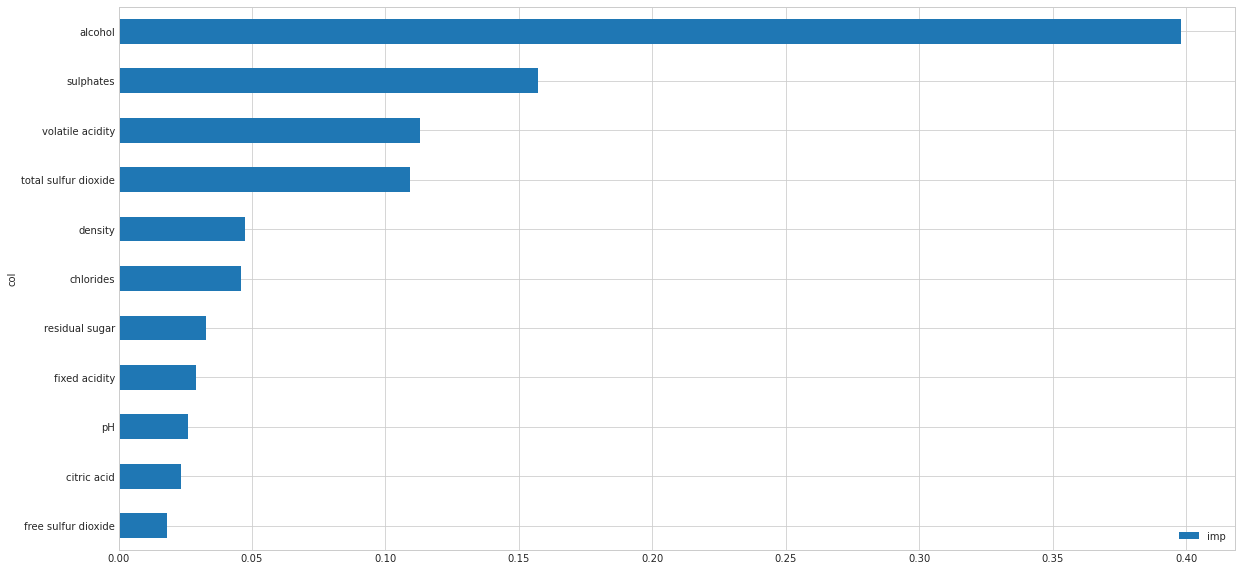

In [46]:
feature_importance(model_gbt, X_train)